In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, time
from scipy.integrate import cumtrapz

In [50]:
data = pd.read_csv('data_step2.csv', names=['time', 'gyro.x', 'gyro.y', 'gyro.z', 'accel.x', 'accel.y', 'accel.z', 'temperature'])
data.head()

,time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z,temperature
0,148513000,6.885496,4.244275,2.839695,0.223389,0.973877,-0.032959,26.553528
1,150083000,6.687023,3.816794,3.374046,0.221191,0.981689,-0.029297,26.647646
2,150997000,6.809160,3.480916,3.618321,0.209229,0.980469,-0.037354,26.694706
3,151816000,7.007634,3.022901,3.786260,0.215332,0.984131,-0.035889,26.647646
4,152627000,6.977099,2.305344,3.648855,0.211670,0.991211,-0.040771,26.553528


In [51]:
data['time'] = data['time'] * 0.00_000_0001
data['t'] = pd.to_datetime(data['time'] + time.time(), unit='s')
data.set_index(data['t'], inplace=True)
data.head()

,time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z,temperature,t
t,,,,,,,,,
2024-10-21 11:15:57.324420096,0.148513,6.885496,4.244275,2.839695,0.223389,0.973877,-0.032959,26.553528,2024-10-21 11:15:57.324420096
2024-10-21 11:15:57.325989888,0.150083,6.687023,3.816794,3.374046,0.221191,0.981689,-0.029297,26.647646,2024-10-21 11:15:57.325989888
2024-10-21 11:15:57.326903808,0.150997,6.809160,3.480916,3.618321,0.209229,0.980469,-0.037354,26.694706,2024-10-21 11:15:57.326903808
2024-10-21 11:15:57.327722752,0.151816,7.007634,3.022901,3.786260,0.215332,0.984131,-0.035889,26.647646,2024-10-21 11:15:57.327722752
2024-10-21 11:15:57.328533760,0.152627,6.977099,2.305344,3.648855,0.211670,0.991211,-0.040771,26.553528,2024-10-21 11:15:57.328533760


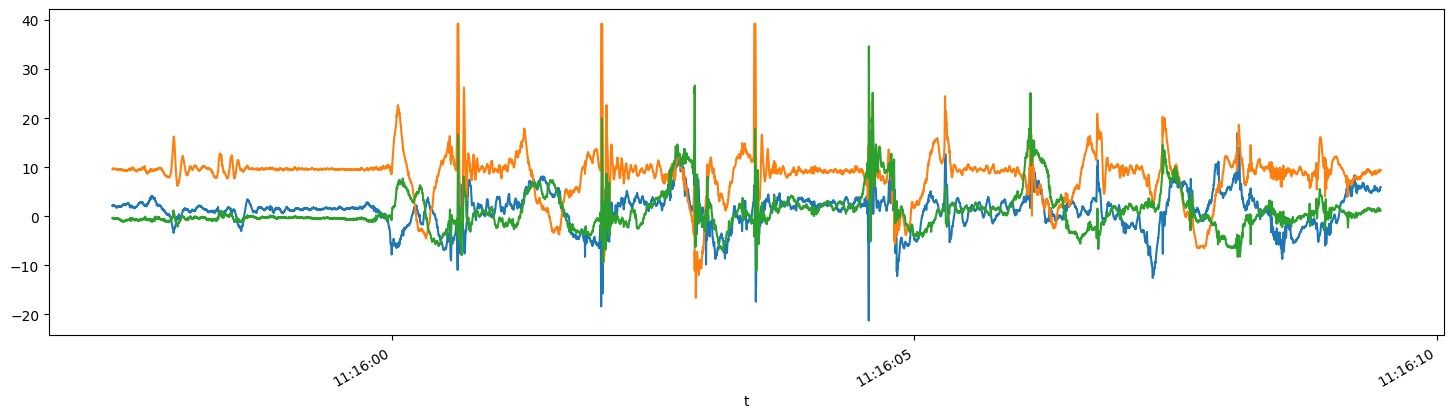

In [52]:
fig, ax = plt.subplots(1,1)

data['accel.x'] = data['accel.x'] * 9.8
data['accel.y'] = data['accel.y'] * 9.8
data['accel.z'] = data['accel.z'] * 9.8

data['accel.x'].plot(ax=ax)
data['accel.y'].plot(ax=ax)
data['accel.z'].plot(ax=ax)

fig.set_figwidth(18)

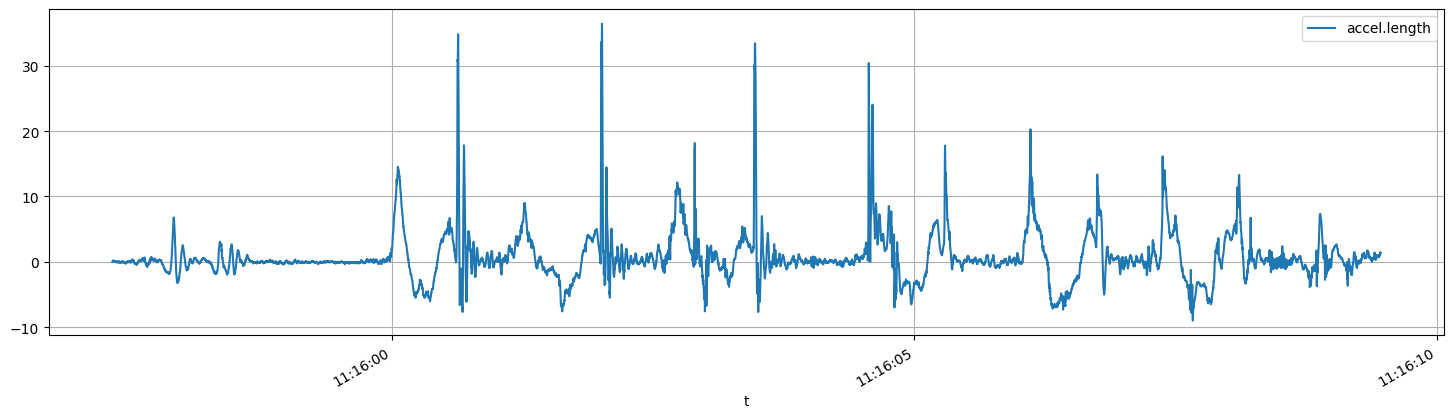

In [53]:
fig, ax = plt.subplots(1,1)
ax.grid()

data['accel.length'] = np.sqrt(data['accel.y'] ** 2 + data['accel.x'] ** 2 + data['accel.z']**2) - 9.8
data['accel.length'].plot(ax=ax)

ax.grid()
ax.legend()

fig.set_figwidth(18)

In [54]:
# Calculate delta time for integration (time differences between points)
dt = np.diff(data['time'], prepend=0)  # prepend=0 to align dimensions

# Integrate acceleration to get velocity for x, y, and z
data['vel.x'] = cumtrapz(data['accel.x'], data['time'], initial=0)
data['vel.y'] = cumtrapz(data['accel.y'], data['time'], initial=0)
data['vel.z'] = cumtrapz(data['accel.z'], data['time'], initial=0)

# Integrate velocity to get position for x, y, and z
data['pos.x'] = cumtrapz(data['vel.x'], data['time'], initial=0)
data['pos.y'] = cumtrapz(data['vel.y'], data['time'], initial=0)
data['pos.z'] = cumtrapz(data['vel.z'], data['time'], initial=0)

/tmp/ipykernel_59113/1761658527.py:5: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  data['vel.x'] = cumtrapz(data['accel.x'], data['time'], initial=0)
/tmp/ipykernel_59113/1761658527.py:6: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  data['vel.y'] = cumtrapz(data['accel.y'], data['time'], initial=0)
/tmp/ipykernel_59113/1761658527.py:7: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  data['vel.z'] = cumtrapz(data['accel.z'], data['time'], initial=0)
/tmp/ipykernel_59113/1761658527.py:10: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  data['pos.x'] = cumtrapz(data['vel.x'], da

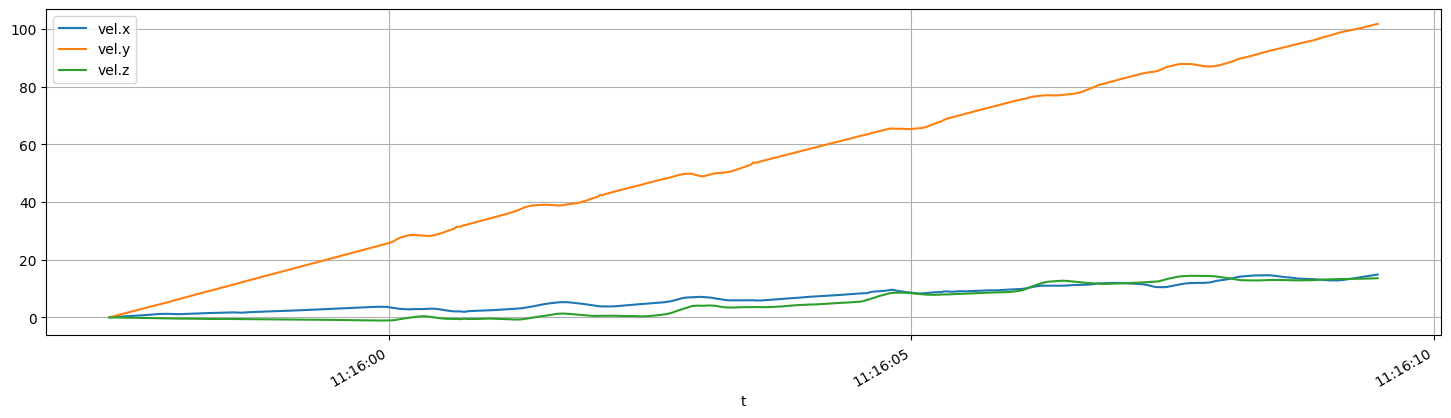

In [55]:
fig, ax = plt.subplots(1,1)
ax.grid()

data['vel.x'].plot(ax=ax)
data['vel.y'].plot(ax=ax)
data['vel.z'].plot(ax=ax)

ax.grid()
ax.legend()

fig.set_figwidth(18)

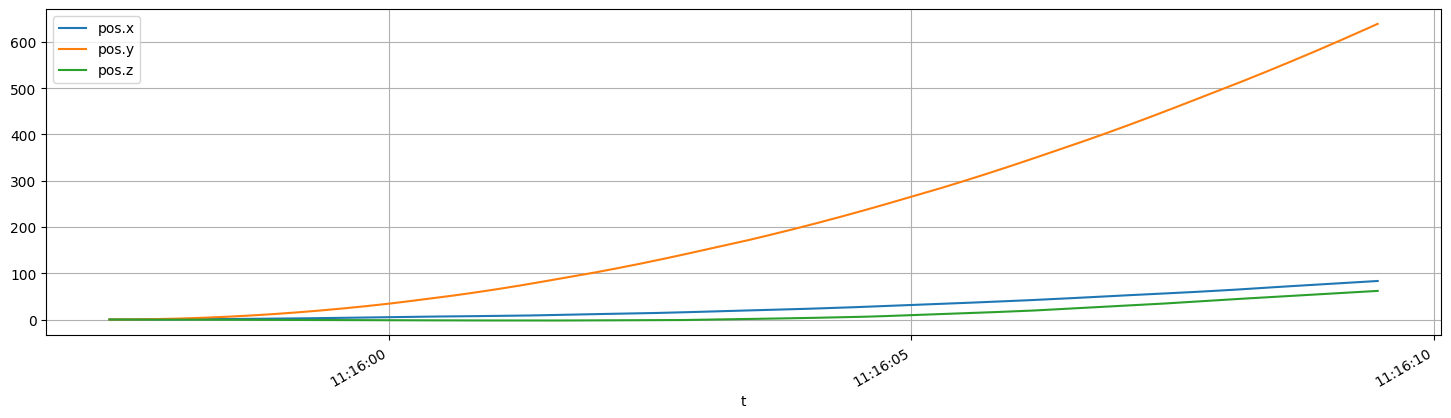

In [56]:
fig, ax = plt.subplots(1,1)
ax.grid()

data['pos.x'].plot(ax=ax)
data['pos.y'].plot(ax=ax)
data['pos.z'].plot(ax=ax)

ax.grid()
ax.legend()

fig.set_figwidth(18)

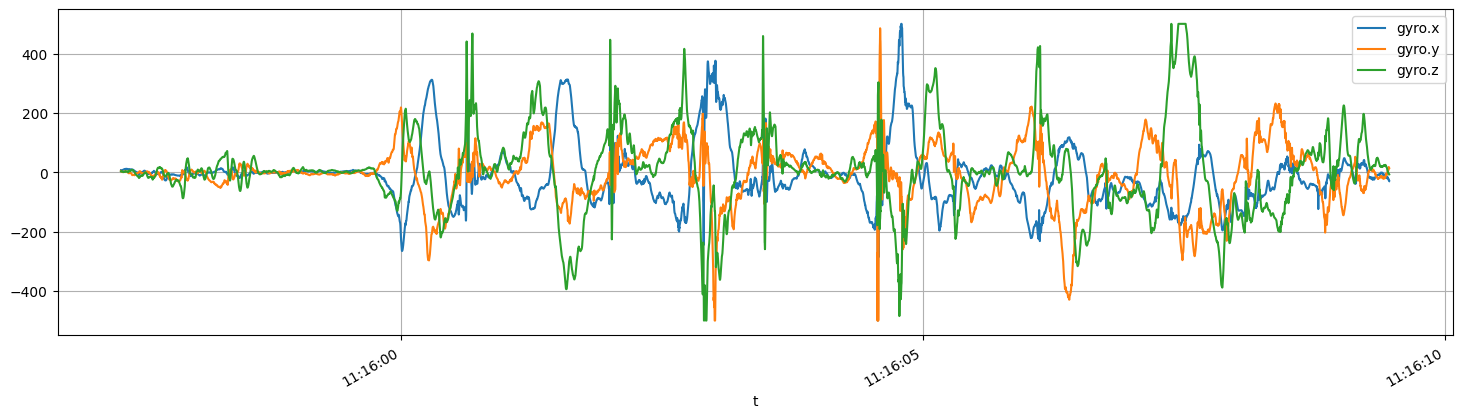

In [57]:
fig, ax = plt.subplots(1,1)
ax.grid()

data['gyro.x'].plot(ax=ax)
data['gyro.y'].plot(ax=ax)
data['gyro.z'].plot(ax=ax)

ax.grid()
ax.legend()

fig.set_figwidth(18)

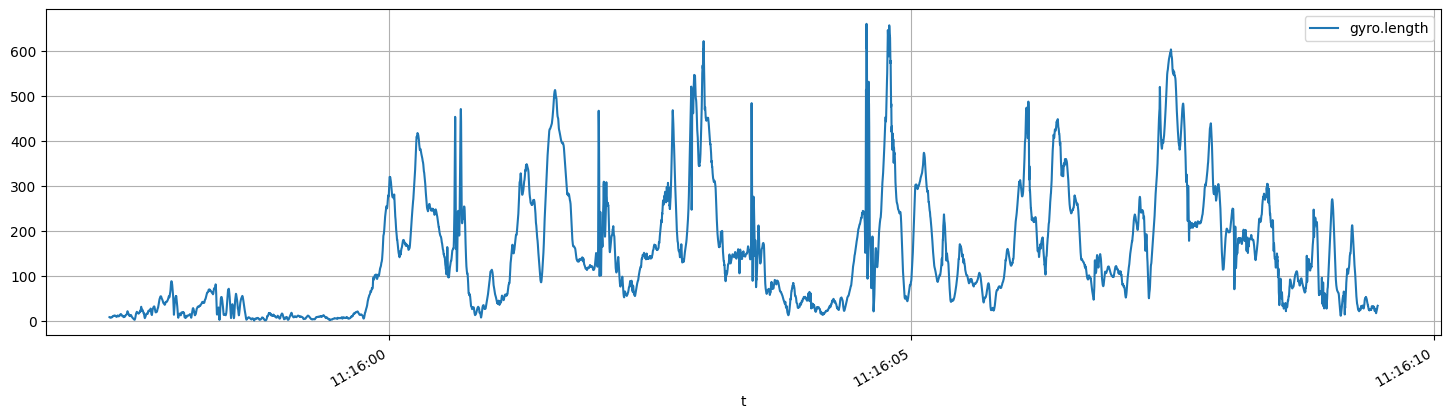

In [58]:
fig, ax = plt.subplots(1,1)
ax.grid()

data['gyro.length'] = np.sqrt(data['gyro.y'] ** 2 + data['gyro.x'] ** 2 + data['gyro.z']**2)
data['gyro.length'].plot(ax=ax)

ax.grid()
ax.legend()

fig.set_figwidth(18)